![Logo](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRL4-k1y2xVVzaoRAMaXSFpl6LiU4Yh7OFr3g&s)

Réaliser Par:<BR>
    YOUSSEF EL WALI<BR>
Encadrer Par:<br>
    Abdelkrim EL MOUATASIM<br>

<center><h2>Réalisation d'un Réseau de neurones (Mini-projet)

<h3>**Pour la réalisation de ce projet, nous dépendons de l'utilisation de Python from scratch et de PyTorch, et nous allons comparer les deux résultats pour avoir une idée sur l'efficacité d'utiliser PyTorch.**

<h2>1- L'objectif de Mini-projet:

Vous devez développer un programme Python qui permet d'implémenter un réseau de neurones avec un nombre de noeuds d'entrée variable, un nombre de couches cachées variable et un nombre variable de neurones dans chaque couche cachée. Le réseau de neurones doit être capable de prendre des données en entrée, effectuer des calculs à travers les couches cachées et générer une sortie prédite.

Votre programme doit inclure les fonctionnalités suivantes :

1. Une fonction pour initialiser les poids et les biais du réseau de neurones.
2. Une fonction pour propager les données à travers le réseau (propagation avant).
3. Une fonction pour mettre à jour les poids et les biais en utilisant la rétropropagation du gradient.
4. Une fonction pour entraîner le réseau de neurones en utilisant un ensemble de données d'apprentissage.
5. Une fonction pour effectuer des prédictions sur de nouvelles données en utilisant le réseau de neurones entraîné.

Votre programme doit être flexible et permettre à l'utilisateur de spécifier le nombre de noeuds d'entrée, le nombre de couches cachées et le nombre de neurones dans chaque couche cachée. Il doit également être capable de gérer des tâches de classification ou de régression.

**Avant de nous plonger profondément dans notre projet, nous devons avoir une idée claire et précise de l'aspect mathématique d'un réseau de neurones**

### Initialisation des poids et des biais :

Les poids sont initialisés aléatoirement selon la formule suivante :

$$
W_i \in \mathbb{R}^{n_i \times n_{i+1}}
$$

Les biais sont initialisés à zéro :

$$
b_i \in \mathbb{R}^{1 \times n_{i+1}}
$$

### Propagation avant (Forward Propagation) :

La sortie de chaque couche est calculée comme suit :

$$
a^{[i]} = \sigma(W^{[i]} a^{[i-1]} + b^{[i]})
$$

Où la fonction sigmoïde est définie par :

$$
\sigma(x) = \frac{1}{1 + \exp(-x)}
$$

### Rétropropagation (Backward Propagation) :

Erreur pour la couche de sortie :

$$
\delta^{[L]} = \frac{a^{[L]} - y}{m} \cdot \sigma'(a^{[L]})
$$

Les gradients pour les poids et biais de la couche de sortie sont :

$$
\frac{\partial \text{Loss}}{\partial W^{[L]}} = \frac{1}{m} \cdot a^{[L-1]^T} \delta^{[L]}
$$

$$
\frac{\partial \text{Loss}}{\partial b^{[L]}} = \frac{1}{m} \sum_{i=1}^{m} \delta^{[L]}_i
$$

Erreur rétropropagée aux couches cachées :

$$
\delta^{[l]} = (\delta^{[l+1]} W^{[l+1]^T}) \cdot \sigma'(a^{[l]})
$$

Les gradients pour les poids et biais de chaque couche cachée :

$$
\frac{\partial \text{Loss}}{\partial W^{[l]}} = \frac{1}{m} \cdot a^{[l-1]^T} \delta^{[l]}
$$

$$
\frac{\partial \text{Loss}}{\partial b^{[l]}} = \frac{1}{m} \sum_{i=1}^{m} \delta^{[l]}_i
$$

### Mise à jour des poids et des biais :

Les poids et biais sont mis à jour par la descente de gradient :

$$
W^{[l]} \leftarrow W^{[l]} - \eta \frac{\partial \text{Loss}}{\partial W^{[l]}}
$$

$$
b^{[l]} \leftarrow b^{[l]} - \eta \frac{\partial \text{Loss}}{\partial b^{[l]}}
$$

### Calcul de la perte (Loss) :

La fonction de perte MSE est donnée par :

$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y^{[i]} - \hat{y}^{[i]})^2
$$


<b>1-Importer les bibliothéques nécessaire

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
%matplotlib inline

<b>2-Le premier modèle que j'ai créé, je l'ai développé en Python from scratch

In [2]:
class NeuralNetwork:
    #un réseau de neurones avec un nombre de noeuds(input_nodes) d'entrée variable
    #un nombre de couches cachées(hidden_layers) variable et un nombre variable de neurones
    #dans chaque couche cachée(hidden_nodes)
    def __init__(self, input_nodes, hidden_layers, hidden_nodes, output_nodes):
        self.input_nodes = input_nodes
        self.hidden_layers = hidden_layers
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.weights, self.biases = self.initialize_weights_and_biases()
    #Une fonction pour initialiser les poids et les biais du réseau de neurones.
    def initialize_weights_and_biases(self):
        weights = []
        biases = []
        # Initialize weights and biases for input to first hidden layer
        weights.append(np.random.randn(self.input_nodes, self.hidden_nodes))
        biases.append(np.zeros((1, self.hidden_nodes)))
        # Initialize weights and biases for hidden layers
        for _ in range(self.hidden_layers - 1):
            weights.append(np.random.randn(self.hidden_nodes, self.hidden_nodes))
            biases.append(np.zeros((1, self.hidden_nodes)))
        # Initialize weights and biases for last hidden layer to output
        weights.append(np.random.randn(self.hidden_nodes, self.output_nodes))
        biases.append(np.zeros((1, self.output_nodes)))
        return weights, biases
    #Une fonction pour propager les données à travers le réseau (propagation avant)

    def forward_propagation(self, inputs):
        self.layer_outputs = []
        self.layer_outputs.append(inputs)
        for i in range(self.hidden_layers + 1):
            layer_input = self.layer_outputs[i]
            layer_output = self.sigmoid(np.dot(layer_input, self.weights[i]) + self.biases[i])
            self.layer_outputs.append(layer_output)

        return self.layer_outputs[-1]
    #Une fonction pour mettre à jour les poids et les biais en utilisant la rétropropagation du gradient
    def backward_propagation(self, inputs, labels, learning_rate):
        batch_size = inputs.shape[0]

        # Compute gradients for the output layer
        error = (self.layer_outputs[-1] - labels) / batch_size
        delta = error * self.sigmoid_derivative(self.layer_outputs[-1])
        weight_gradient = np.dot(self.layer_outputs[-2].T, delta)
        bias_gradient = np.sum(delta, axis=0, keepdims=True)

        self.weights[-1] -= learning_rate * weight_gradient
        self.biases[-1] -= learning_rate * bias_gradient

        # Backpropagate the error to hidden layers
        for i in range(self.hidden_layers - 1, -1, -1):
            delta = np.dot(delta, self.weights[i + 1].T) * self.sigmoid_derivative(self.layer_outputs[i + 1])
            weight_gradient = np.dot(self.layer_outputs[i].T, delta)
            bias_gradient = np.sum(delta, axis=0, keepdims=True)

            self.weights[i] -= learning_rate * weight_gradient
            self.biases[i] -= learning_rate * bias_gradient
    #Une fonction pour entraîner le réseau de neurones en utilisant un ensemble de données d'apprentissage.
    def train(self, inputs, labels, learning_rate, num_epochs):
        loss_values=[]
        for epoch in range(num_epochs):
            # Forward propagation
            outputs = self.forward_propagation(inputs)

            # Backward propagation
            self.backward_propagation(inputs, labels, learning_rate)

            # Compute loss (MSE for regression, cross-entropy for classification)
            loss = self.mean_squared_error(outputs, labels)
            loss_values.append(loss)

            # Print loss for each epoch
            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss:.4f}")
        return loss_values

        print("Training finished.")

    #Une fonction pour effectuer des prédictions sur de nouvelles données en utilisant le réseau de neurones entraîné

    def predict(self, inputs):
        return self.forward_propagation(inputs)
    #En limitant les valeurs de sortie entre 0 et 1
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

<b>1-Exemple</b><br>
Dans ce dataset, je suis en train de créer un ensemble de données pour une tâche de classification binaire

In [3]:

# Set the number of samples
num_samples = 10000

# Set the number of features
num_features = 10

# Set the number of informative features
num_informative = 5

# Generate a synthetic classification dataset
X, y = make_classification(
    n_samples=num_samples,
    n_features=num_features,
    n_informative=num_informative,
    n_classes=2,
)

# Print the shape of the dataset
print("Dataset shape:", X.shape, y.shape)

Dataset shape: (10000, 10) (10000,)


In [4]:
network = NeuralNetwork(input_nodes=num_features, hidden_layers=2, hidden_nodes=4, output_nodes=1)
# Reshape the labels to match the network's output shape
y = y.reshape(-1, 1)
loss_values=network.train(X[:7000], y[:7000], learning_rate=0.1, num_epochs=10000)


Streaming output truncated to the last 5000 lines.
Epoch 5001/10000, Loss: 0.0681
Epoch 5002/10000, Loss: 0.0681
Epoch 5003/10000, Loss: 0.0681
Epoch 5004/10000, Loss: 0.0681
Epoch 5005/10000, Loss: 0.0681
Epoch 5006/10000, Loss: 0.0681
Epoch 5007/10000, Loss: 0.0680
Epoch 5008/10000, Loss: 0.0680
Epoch 5009/10000, Loss: 0.0680
Epoch 5010/10000, Loss: 0.0680
Epoch 5011/10000, Loss: 0.0680
Epoch 5012/10000, Loss: 0.0680
Epoch 5013/10000, Loss: 0.0680
Epoch 5014/10000, Loss: 0.0680
Epoch 5015/10000, Loss: 0.0680
Epoch 5016/10000, Loss: 0.0680
Epoch 5017/10000, Loss: 0.0680
Epoch 5018/10000, Loss: 0.0680
Epoch 5019/10000, Loss: 0.0680
Epoch 5020/10000, Loss: 0.0680
Epoch 5021/10000, Loss: 0.0680
Epoch 5022/10000, Loss: 0.0680
Epoch 5023/10000, Loss: 0.0680
Epoch 5024/10000, Loss: 0.0679
Epoch 5025/10000, Loss: 0.0679
Epoch 5026/10000, Loss: 0.0679
Epoch 5027/10000, Loss: 0.0679
Epoch 5028/10000, Loss: 0.0679
Epoch 5029/10000, Loss: 0.0679
Epoch 5030/10000, Loss: 0.0679
Epoch 5031/10000, L

**Après l'entraînement, vous pouvez faire des prédictions sur de nouvelles données.**

In [5]:
predictions = network.predict(X[7000:])
print("Predictions:")
print(predictions)

Predictions:
[[0.03015585]
 [0.13612247]
 [0.04521348]
 ...
 [0.07309439]
 [0.13942504]
 [0.49855255]]


**Le calcul de la précision et de la performance de notre modèle.**

In [6]:
# Convert predicted probabilities to class labels
predicted_labels = np.round(predictions).astype(int)  # Replace 'predictions' with your actual predicted values
# Calculate accuracy
accuracy = np.mean(predicted_labels == y[7000:]) * 100
print("Accuracy:", accuracy)

Accuracy: 92.0


**À partir du graphique ci-dessous, j'observe que l'erreur diminue jusqu'à atteindre la valeur de 0,1**

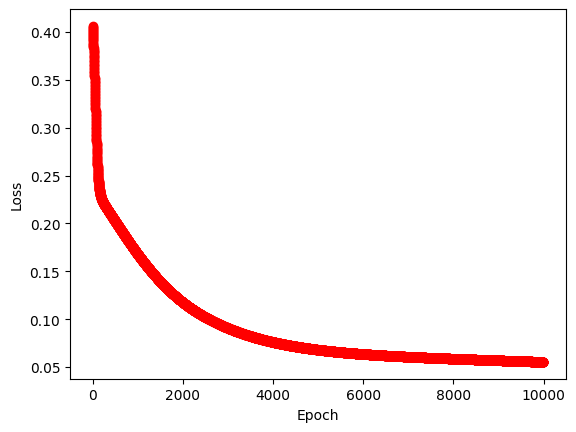

In [7]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')

**Le deuxième modèle, je l'ai créé avec PyTorch**

In [8]:
# Définition du modèle de réseau de neurones pour une tâche de classification binaire
class NeuralNetwork(nn.Module):
    def __init__(self, input_nodes, hidden_layers, hidden_nodes, output_nodes):
        super(NeuralNetwork, self).__init__()

        # Initialisation des couches
        self.input_layer = nn.Linear(input_nodes, hidden_nodes)

        # Créer des couches cachées dynamiquement
        self.hidden_layers = nn.ModuleList()
        for _ in range(hidden_layers - 1):
            self.hidden_layers.append(nn.Linear(hidden_nodes, hidden_nodes))

        # Dernière couche vers la sortie
        self.output_layer = nn.Linear(hidden_nodes, output_nodes)

        # Fonction d'activation
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Propagation dans la première couche d'entrée
        x = self.sigmoid(self.input_layer(x))

        # Propagation dans les couches cachées
        for layer in self.hidden_layers:
            x = self.sigmoid(layer(x))

        # Sortie finale
        x = self.sigmoid(self.output_layer(x))
        return x

    def train_model(self, inputs, labels, learning_rate, num_epochs):
        # Configuration de la fonction de perte et de l'optimiseur
        criterion = nn.BCELoss()  # Binary Cross Entropy pour une tâche de classification binaire
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)

        loss_values = []
        for epoch in range(num_epochs):
            # Remise à zéro des gradients
            optimizer.zero_grad()

            # Propagation avant
            outputs = self.forward(inputs)

            # Calcul de la perte
            loss = criterion(outputs, labels)
            loss_values.append(loss.item())

            # Rétropropagation
            loss.backward()

            # Mise à jour des poids
            optimizer.step()

            # Affichage de la perte
            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

        print("Training finished.")
        return loss_values

    def predict(self, inputs):
        with torch.no_grad():
            predictions = self.forward(inputs)
            return (predictions >= 0.5).float()  # Convertir en 0 ou 1

**La réalisation d'un test en utilisant un jeu de données de classification**

In [9]:
# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir les données en tenseurs PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # pour une tâche binaire
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Initialisation du modèle
input_nodes = num_features
hidden_layers = 2
hidden_nodes = 16
output_nodes = 1

model = NeuralNetwork(input_nodes, hidden_layers, hidden_nodes, output_nodes)

# Entraînement du modèle
learning_rate = 0.01
num_epochs = 1100
loss_value=model.train_model(X_train_tensor, y_train_tensor, learning_rate, num_epochs)

# Évaluation du modèle sur les données de test
y_pred = model.predict(X_test_tensor)
accuracy = accuracy_score(y_test, y_pred.numpy())
print(f"Accuracy on test set: {accuracy:.4f}")


Epoch 1/1100, Loss: 0.6924
Epoch 2/1100, Loss: 0.6903
Epoch 3/1100, Loss: 0.6881
Epoch 4/1100, Loss: 0.6856
Epoch 5/1100, Loss: 0.6826
Epoch 6/1100, Loss: 0.6792
Epoch 7/1100, Loss: 0.6751
Epoch 8/1100, Loss: 0.6703
Epoch 9/1100, Loss: 0.6647
Epoch 10/1100, Loss: 0.6583
Epoch 11/1100, Loss: 0.6508
Epoch 12/1100, Loss: 0.6424
Epoch 13/1100, Loss: 0.6329
Epoch 14/1100, Loss: 0.6223
Epoch 15/1100, Loss: 0.6106
Epoch 16/1100, Loss: 0.5978
Epoch 17/1100, Loss: 0.5839
Epoch 18/1100, Loss: 0.5690
Epoch 19/1100, Loss: 0.5533
Epoch 20/1100, Loss: 0.5368
Epoch 21/1100, Loss: 0.5198
Epoch 22/1100, Loss: 0.5024
Epoch 23/1100, Loss: 0.4848
Epoch 24/1100, Loss: 0.4672
Epoch 25/1100, Loss: 0.4499
Epoch 26/1100, Loss: 0.4330
Epoch 27/1100, Loss: 0.4167
Epoch 28/1100, Loss: 0.4011
Epoch 29/1100, Loss: 0.3862
Epoch 30/1100, Loss: 0.3721
Epoch 31/1100, Loss: 0.3589
Epoch 32/1100, Loss: 0.3464
Epoch 33/1100, Loss: 0.3347
Epoch 34/1100, Loss: 0.3237
Epoch 35/1100, Loss: 0.3134
Epoch 36/1100, Loss: 0.3036
E

**On observe à partir de ce graphique que l'erreur diminue jusqu'à atteindre environ 0,3**

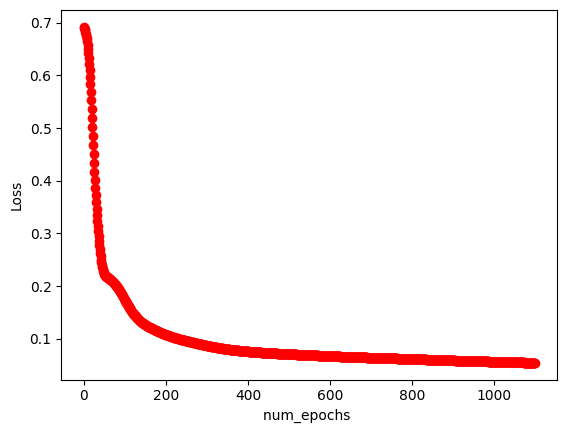

In [10]:
plt.xlabel("num_epochs ")
plt.ylabel("Loss")
plt.plot(loss_value, 'ro')

<h1>La comparaison basée sur l'utilisation des deux modèles : le premier créé from scratch et le deuxième avec PyTorch

Quand j'ai utilisé le réseau de neurones from scratch, j'obtiens une précision de 92 %, et quand j'utilise PyTorch, j'obtiens une précision de 98 %, ce qui me permet de déduire que PyTorch est un modèle très efficace pour les réseaux de neurones